<a href="https://colab.research.google.com/github/jalestheprogramer/IA-LSTM-PREVIS-O-DE-SERIES-TEMPORAIS/blob/main/C%C3%B3pia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO FINAL - INTELIGENCIA ARTIFICIAL

### Previsão de séries temporais (temperatura, tráfego, energia)

DICIPLINA: INTELIGENCIA ARTIFICIAL

PROFESSOR: MARCO ANTONIO FIRMINO DE SOUSA

INTEGRANTES: Jales Lima da Silveira Junior,
Luiz Eduardo Woicik,
Lucas Gabriel Sousa da Silva.

TEMA: 5.4 - LSTM

Instalação das bibliotecas

In [ ]:

!pip install --quiet pandas numpy matplotlib scikit-learn tensorflow



## MOTIVO DA ESCOLHA
A escolha do modelo LSTM (Long Short-Term Memory) é motivada por características específicas desse tipo de série temporal e pelas necessidades do problema, sendo um modelo que retém informações a longo prazo e é capaz de detectar padrões que se estendem por longos intervalos.

MÓDULO 1: IMPORTAÇÃO E PREPARAÇÃO DOS DADOS BRUTOS

É responsável por:

1.  **Importar bibliotecas:** Ele importa bibliotecas essenciais como `pandas` para manipulação de dados, `numpy` para operações numéricas, `matplotlib.pyplot` para visualização, `math` para funções matemáticas, e `tensorflow` e módulos específicos do `sklearn` (como `MinMaxScaler`, `TimeSeriesSplit`, `mean_squared_error`, `LSTM`, `Dense`, `Dropout`, `Input`) que são usados para a criação e avaliação do modelo de *series temporais*.

2.  **Carregar dados:** Carrega o arquivo CSV "daily-minimum-temperatures-in-me.csv" para um DataFrame do pandas, usando vírgulas como separador e lidando com linhas malformadas.

      Link para baixar o dataset: https://www.kaggle.com/datasets/samfaraday/daily-minimum-temperatures-in-me?resource=download

3.  **Renomear coluna:** Verifica se a coluna de índice já é 'Date'. Em seguida, ele renomeia a segunda coluna do DataFrame (que contém os dados de temperatura) para 'Temperature' para facilitar o uso.

4.  **Processar datas:** Converte a coluna 'Date' para o tipo datetime e a define como o índice do DataFrame.

5.  **Limpar dados de temperatura:** Converte a coluna 'Temperature' para o tipo numérico, forçando quaisquer valores não numéricos a se tornarem `NaN` (Not a Number). Em seguida, remove todas as linhas que contenham `NaN` na coluna 'Temperature' para garantir que os dados estejam limpos para o modelo.

6.  **Informar sobre o carregamento:** Por fim, imprime uma mensagem informando que o Módulo 1 foi concluído e quantos registros foram carregados, além de exibir as primeiras 5 linhas do DataFrame processado (`df.head()`).

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

df = pd.read_csv("daily-minimum-temperatures-in-me.csv", sep=',', engine='python', on_bad_lines='skip')

if df.index.name == 'Date':
    df = df.reset_index()

temp_col_name_old = df.columns[1]
df.rename(columns={temp_col_name_old: 'Temperature'}, inplace=True)

df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

df['Temperature'] = pd.to_numeric(df['Temperature'].astype(str).str.strip(), errors='coerce')
df.dropna(subset=['Temperature'], inplace=True)

print("Módulo 1 (LSTM) concluído. Dados carregados: ", len(df))
df.head()

Módulo 1 (LSTM) concluído. Dados carregados:  3647


,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


MÓDULO EXTRA 1.5: VISUALIZAÇÃO DOS DADOS BRUTOS


### Detalhamento do Código:

1.  **`import matplotlib.pyplot as plt`**:
    *   Importa a biblioteca `matplotlib` (especificamente o módulo `pyplot`) e a renomeia para `plt`. `matplotlib` é uma biblioteca amplamente utilizada para criar visualizações estáticas, animadas e interativas em Python.

2.  **`plt.figure(figsize=(15, 6))`**:
    *   Cria uma nova figura para o gráfico com um tamanho especificado de 15 polegadas de largura por 6 polegadas de altura. Isso ajuda a garantir que o gráfico tenha um bom espaço para ser visualizado.

3.  **`plt.plot(df.index, df['Temperature'], color='green', alpha=0.6, linewidth=1)`**:
    *   Plota os dados da série temporal.
        *   `df.index`: Usa as datas como o eixo X (o índice do DataFrame `df`).
        *   `df['Temperature']`: Usa os valores da coluna 'Temperature' como o eixo Y.
        *   `color='green'`: Define a cor da linha do gráfico como verde.
        *   `alpha=0.6`: Define a transparência da linha em 60%, tornando-a ligeiramente translúcida.
        *   `linewidth=1`: Define a largura da linha como 1 pixel.

4.  **`plt.title('Histórico Completo de Temperaturas (1981-1990)', fontsize=16)`**:
    *   Define o título do gráfico, explicando o que ele representa e o período de tempo abrangido, com um tamanho de fonte de 16.

5.  **`plt.xlabel('Ano')`** e **`plt.ylabel('Temperatura (°C)')`**:
    *   Definem os rótulos para o eixo X (Ano) e para o eixo Y (Temperatura em graus Celsius), respectivamente.

6.  **`plt.grid(True, alpha=0.3)`**:
    *   Adiciona uma grade ao gráfico para facilitar a leitura dos valores, com uma transparência de 30%.

7.  **`media_temp = df['Temperature'].mean()`**:
    *   Calcula a média de todas as temperaturas presentes na coluna 'Temperature' do DataFrame `df` e armazena o resultado na variável `media_temp`.

8.  **`plt.axhline(y=media_temp, color='red', linestyle='--', label=f'Média Geral: {media_temp:.1f}°C')`**:
    *   Adiciona uma linha horizontal ao gráfico.
        *   `y=media_temp`: A linha é desenhada na altura correspondente à média das temperaturas.
        *   `color='red'`: A cor da linha é vermelha.
        *   `linestyle='--'`: A linha é tracejada.
        *   `label=f'Média Geral: {media_temp:.1f}°C'`: Define um rótulo para esta linha, que incluirá o valor da média arredondado para uma casa decimal.

9.  **`plt.legend()`**:
    *   Exibe a legenda do gráfico, que incluirá o rótulo da linha de média geral.

10. **`plt.tight_layout()`**:
    *   Ajusta automaticamente os parâmetros do subplot para que o gráfico caiba perfeitamente na área da figura, evitando sobreposições de rótulos e títulos.

11. **`plt.show()`**:
    *   Exibe o gráfico na saída.

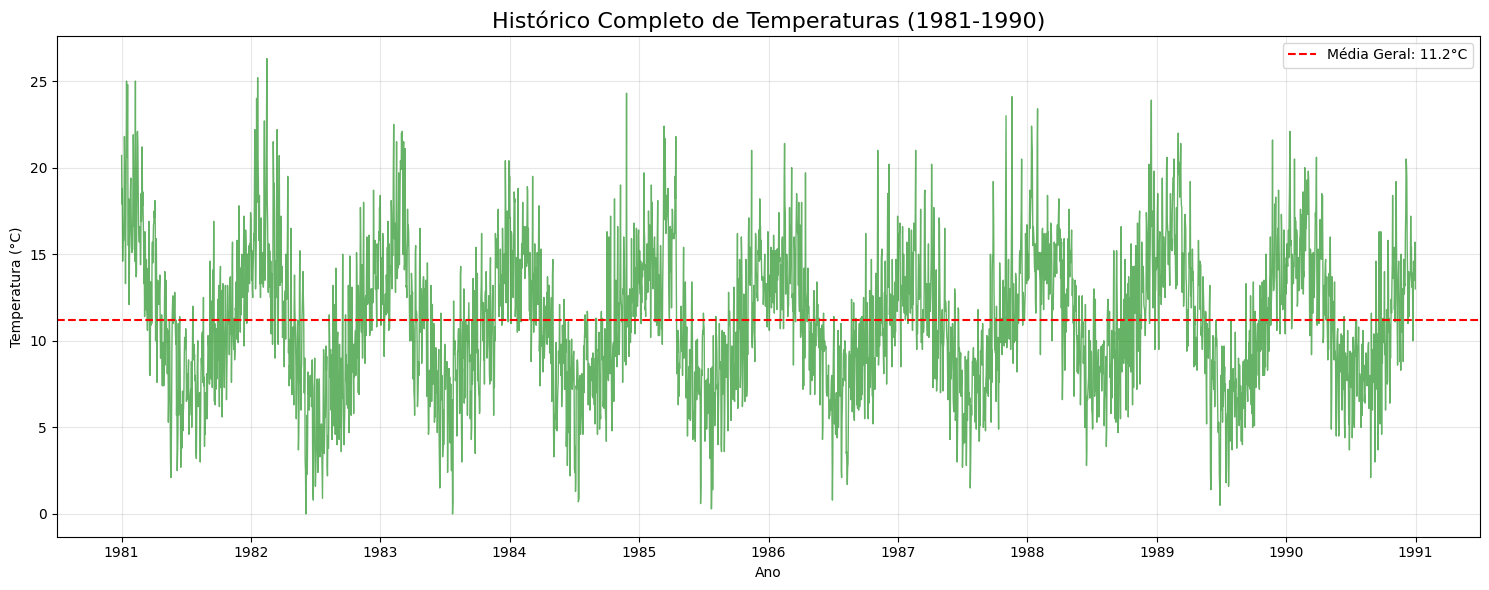

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Temperature'], color='green', alpha=0.6, linewidth=1)
plt.title('Histórico Completo de Temperaturas (1981-1990)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)

media_temp = df['Temperature'].mean()
plt.axhline(y=media_temp, color='red', linestyle='--', label=f'Média Geral: {media_temp:.1f}°C')
plt.legend()

plt.tight_layout()
plt.show()

MÓDULO 2: CONFIGURAÇÕES E FUNÇÃO AUXILIAR



### 1. Definição de Variáveis Globais:
*   `TAMANHO_JANELA = 90`: Define o tamanho da janela de tempo (em dias) que será usada para prever o próximo ponto. Ou seja, o modelo usará os 90 dias anteriores para fazer uma previsão.
*   `N_SPLITS = 5`: Este é o número de divisões (folds) para a validação cruzada do tipo K-Fold. Indica que o conjunto de dados será dividido em 5 partes para o treinamento e teste do modelo.
*   `CELULAS = 70`: Representa o número de unidades ou neurônios na camada LSTM do modelo. Um número maior de células pode capturar padrões mais complexos, mas também aumenta o risco de *overfitting*.
*   `BATCH_SIZE = 20`: Especifica o número de amostras de treinamento que serão processadas antes que os parâmetros do modelo sejam atualizados. Tamanhos de *batch* menores podem levar a um treinamento mais estável, mas mais lento.
*   `EPOCHS = 350`: Define o número de vezes que o algoritmo de treinamento trabalhará em todo o conjunto de dados de treinamento. Mais *epochs* podem melhorar a precisão, mas também aumentam o tempo de treinamento e o risco de *overfitting*.

### 2. Função `criar_janelas(dados, tamanho_janela)`:
Esta função é responsável por transformar a série temporal em um formato adequado para o treinamento de redes neurais recorrentes, como a LSTM. Ela cria pares de entrada (X) e saída (y) onde:
*   `X` (passado): Contém uma sequência de `tamanho_janela` valores anteriores da série.
*   `y` (futuro): Contém o valor seguinte à sequência de `X`, que é o que o modelo tentará prever.

**Como funciona:**
*   Ela itera sobre o array `dados` (que são as temperaturas escaladas) a partir do índice igual ao `tamanho_janela`.
*   Em cada iteração, ela coleta os `tamanho_janela` valores anteriores como `X` e o valor atual como `y`.
*   Ao final, retorna `X` e `y` como arrays NumPy, prontos para serem usados no treinamento do modelo LSTM.

Em resumo, este módulo configura os principais hiperparâmetros do modelo e prepara a função essencial para estruturar os dados de série temporal, permitindo que a rede neural aprenda a prever valores futuros com base em sequências passadas.

In [ ]:
TAMANHO_JANELA = 60
N_SPLITS = 5          #numero de vezes para o k-fold
CELULAS = 45
BATCH_SIZE = 32
EPOCHS = 250

def criar_janelas(dados, tamanho_janela):
    """
    Cria os pares X (passado) e y (futuro) para a rede neural.
    """
    X, y = [], []
    for i in range(tamanho_janela, len(dados)):
        X.append(dados[i-tamanho_janela:i, 0])
        y.append(dados[i, 0])

    return np.array(X), np.array(y)

print(f"Módulo 2 concluído. Configurado para janela de {TAMANHO_JANELA} dias.")

Módulo 2 concluído. Configurado para janela de 60 dias.


MÓDULO 3: LOOP DE TREINAMENTO K-FOLD

Este bloco de código implementa um processo de treinamento e avaliação robusto para um modelo LSTM usando **Validação Cruzada K-Fold com `TimeSeriesSplit`**, ideal para séries temporais.

### Resumo do Código:

1.  **Preparação Inicial**: Extrai os dados de temperatura brutos e inicializa variáveis como a lista de scores RMSE (`rmse_scores`) e um contador de folds (`fold_no`).

2.  **Loop K-Fold**: O código itera através de divisões de treinamento e teste geradas por `TimeSeriesSplit`.

    a.  **Divisão e Normalização**: Em cada iteração (fold), os dados são divididos em conjuntos de treino e teste. Ambos são normalizados usando `MinMaxScaler`, com a atenção de concatenar dados históricos do treino ao teste para a função de janelas.

    b.  **Criação de Janelas**: A função `criar_janelas` (definida no Módulo 2) é usada para transformar os dados escalonados em sequências (X) e seus respectivos alvos (y), no formato 3D que a LSTM espera.

    c.  **Construção e Compilação do Modelo LSTM**: Um novo modelo `Sequential` com camadas LSTM e `Dropout` é criado e compilado (usando Adam optimizer e `mean_squared_error` como perda) para cada fold, garantindo um treinamento independente.

    d.  **Treinamento**: O modelo é treinado com os dados de `X_train` e `y_train`, e o desempenho é validado em `X_test` e `y_test`. O histórico de treinamento do último fold é armazenado.

    e.  **Previsão e Avaliação**: Após o treinamento, o modelo faz previsões nos dados de teste. As previsões e os valores reais são 'desnormalizados' para a escala original. O RMSE (Root Mean Squared Error) é calculado e armazenado para o fold atual.

3.  **Resultados Finais**: Ao final do loop, o código imprime o RMSE para cada fold e calcula a média final dos RMSEs de todos os folds, fornecendo uma métrica geral da performance do modelo.

In [ ]:
data_raw = df[['Temperature']].values
tscv = TimeSeriesSplit(n_splits=N_SPLITS)
rmse_scores = []
fold_no = 1
history_dict = {}

print("Iniciando treinamento com K-Fold (LSTM) com monitoramento de curvas...\n")

for train_index, test_index in tscv.split(data_raw):
    train_data, test_data = data_raw[train_index], data_raw[test_index]

    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data)

    test_input = np.concatenate((train_data[-TAMANHO_JANELA:], test_data))
    test_scaled = scaler.transform(test_input)

    X_train, y_train = criar_janelas(train_scaled, TAMANHO_JANELA)
    X_test, y_test = criar_janelas(test_scaled, TAMANHO_JANELA)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=CELULAS, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data=(X_test, y_test),
                        verbose=0)

    history_dict = history.history

    predictions = model.predict(X_test, verbose=0)
    predictions_inv = scaler.inverse_transform(predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = math.sqrt(mean_squared_error(y_test_inv, predictions_inv))
    rmse_scores.append(rmse)

    print(f"Fold {fold_no}: RMSE = {rmse:.4f} °C")
    fold_no += 1

print("\n" + "="*30)
print(f"Média Final RMSE (LSTM): {np.mean(rmse_scores):.4f} °C")
print("="*30)

Iniciando treinamento com K-Fold (LSTM) com monitoramento de curvas...

Fold 1: RMSE = 2.4713 °C
Fold 2: RMSE = 2.4319 °C
Fold 3: RMSE = 2.3132 °C
Fold 4: RMSE = 2.3862 °C
Fold 5: RMSE = 2.1658 °C

Média Final RMSE (LSTM): 2.3537 °C


MÓDULO 3.3: COMPARAÇÃO TREINO VS TESTE

Este bloco de código é essencial para diagnosticar o desempenho do seu modelo LSTM. Ele plota as curvas de erro de treino e teste para o último *fold* da validação cruzada, o que ajuda a identificar se o modelo está *overfitting*, *underfitting* ou generalizando bem. Permita-me detalhar cada parte:

### Detalhamento do Código:

1.  **Importação de Biblioteca**: `import matplotlib.pyplot as plt` importa a biblioteca `matplotlib` para criar visualizações.
2.  **Preparação dos Dados**:
    *   `loss_treino = history_dict['loss']` e `loss_teste = history_dict['val_loss']` extraem os valores de erro de treinamento e de validação (teste) do dicionário `history_dict`, que foi preenchido durante o treinamento do modelo no Módulo 3.
    *   `epocas = range(1, len(loss_treino) + 1)` cria uma sequência de números para o eixo X, representando cada época de treinamento.
3.  **Criação do Gráfico**:
    *   `plt.figure(figsize=(10, 6))` define o tamanho da figura do gráfico.
    *   `plt.plot(epocas, loss_treino, 'bo-', label='Erro de Treino (Loss)', linewidth=1.5, markersize=4)` desenha a linha para o erro de treino (azul, com marcadores de círculo e linha contínua).
    *   `plt.plot(epocas, loss_teste, 'ro-', label='Erro de Teste (Val_Loss)', linewidth=1.5, markersize=4)` desenha a linha para o erro de teste/validação (vermelha, com marcadores de círculo e linha contínua).
    *   `plt.title('Diagnóstico do Modelo: Treino vs Teste (Último Fold)', fontsize=16)`, `plt.xlabel('Épocas', fontsize=12)`, `plt.ylabel('Erro (MSE)', fontsize=12)`, `plt.legend(fontsize=12)` e `plt.grid(True, alpha=0.3)` são usados para adicionar título, rótulos aos eixos, exibir a legenda e adicionar uma grade ao gráfico.
    *   `plt.annotate(...)` adiciona uma anotação textual e uma seta no gráfico para guiar a interpretação visual, indicando o comportamento ideal das curvas.
    *   `plt.tight_layout()` ajusta automaticamente os parâmetros do subplot para que o gráfico caiba perfeitamente na área da figura, evitando sobreposições.
    *   `plt.show()` exibe o gráfico.
4.  **Diagnóstico Automático**:
    *   As últimas linhas do código (`print` e `if-else`) analisam o valor final do erro de treino (`loss_treino[-1]`) e de teste (`loss_teste[-1]`).
    *   Se o erro de teste for significativamente maior que o erro de treino (neste caso, `loss_teste[-1] > loss_treino[-1] * 1.5`), o código imprime um `ALERTA` de possível *Overfitting* e oferece sugestões (`Aumentar o Dropout ou reduzir as Células`).
    *   Caso contrário, ele indica `SUCESSO`, sugerindo que o modelo está generalizando bem e pode-se prosseguir para a previsão final.

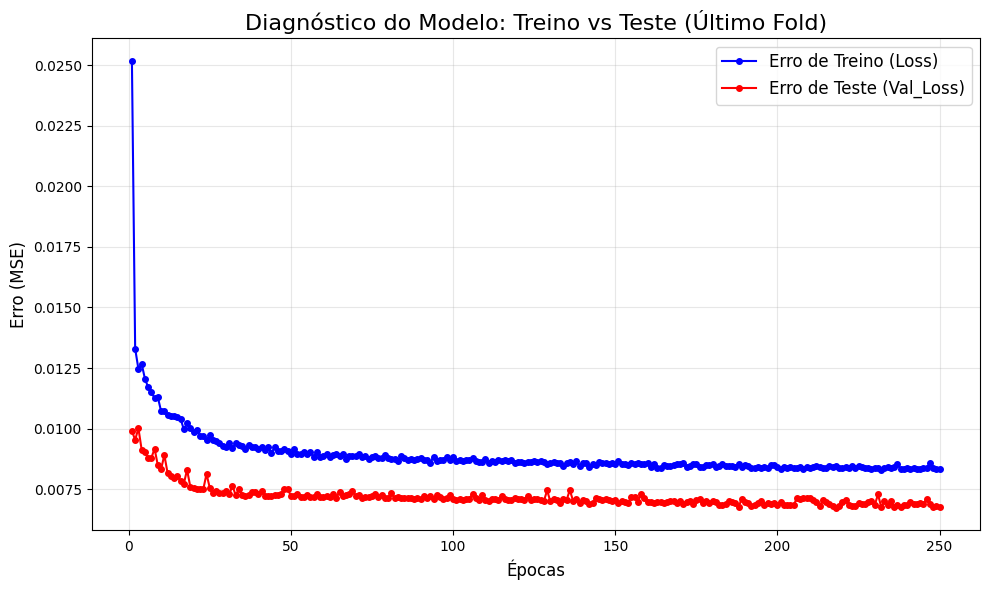


--- COMO LER ESTE GRÁFICO ---
SUCESSO: O modelo está generalizando bem (As linhas estão próximas).
Pode seguir para a previsão final.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

loss_treino = history_dict['loss']
loss_teste = history_dict['val_loss']
epocas = range(1, len(loss_treino) + 1)

plt.plot(epocas, loss_treino, 'bo-', label='Erro de Treino (Loss)', linewidth=1.5, markersize=4)
plt.plot(epocas, loss_teste, 'ro-', label='Erro de Teste (Val_Loss)', linewidth=1.5, markersize=4)

plt.title('Diagnóstico do Modelo: Treino vs Teste (Último Fold)', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Erro (MSE)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.annotate('Ideal: Linhas descem juntas\ne ficam próximas',
             xy=(len(epocas)/2, max(loss_teste)/2),
             xytext=(len(epocas)/2, max(loss_teste)),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()


print("\n--- COMO LER ESTE GRÁFICO ---")
if loss_teste[-1] > loss_treino[-1] * 1.5:
    print("ALERTA: Possível Overfitting (A linha vermelha está muito acima da azul).")
    print("Sugestão: Aumentar o Dropout ou reduzir as Celulas.")
else:
    print("SUCESSO: O modelo está generalizando bem (As linhas estão próximas).")
    print("Pode seguir para a previsão final.")

MÓDULO EXTRA 3.5: ESTABILIDADE DOS FOLDS

### Explicação do Código: Análise da Estabilidade dos Folds

Este bloco de código gera um gráfico de barras para visualizar a performance do modelo (usando o erro RMSE) em cada um dos 'folds' (divisões) da validação cruzada K-Fold. Isso ajuda a entender a estabilidade do modelo em diferentes partes do conjunto de dados.

**Detalhes do Código:**

1.  **`plt.figure(figsize=(15, 10))`**:
    *   Define o tamanho da figura do gráfico para 15 polegadas de largura por 10 polegadas de altura, tornando-o maior para uma melhor visualização.

2.  **`folds = range(1, len(rmse_scores) + 1)`**:
    *   Cria uma sequência de números inteiros (`1, 2, 3, ...`) para representar cada 'fold' (dobra) da validação cruzada. `rmse_scores` é uma lista que armazena o RMSE de cada fold, então `len(rmse_scores)` fornece o número total de folds.

3.  **`plt.bar(folds, rmse_scores, color='skyblue', edgecolor='navy')`**:
    *   Gera um gráfico de barras. O eixo X (`folds`) representa o número do fold, e o eixo Y (`rmse_scores`) representa o valor do RMSE para aquele fold.
    *   `color='skyblue'` define a cor de preenchimento das barras.
    *   `edgecolor='navy'` define a cor da borda das barras.

4.  **`plt.title('Performance do Modelo em Diferentes Períodos (K-Fold)', fontsize=14)`**:
    *   Define o título principal do gráfico, com o tamanho da fonte especificado.

5.  **`plt.xlabel('Número do Fold (Teste)', fontsize=12)`** e **`plt.ylabel('Erro RMSE (°C)', fontsize=12)`**:
    *   Definem os rótulos para o eixo X e o eixo Y, respectivamente, com o tamanho da fonte especificado.

6.  **`plt.xticks(folds)`**:
    *   Garante que todos os números dos folds (1, 2, 3, etc.) sejam exibidos como 'ticks' no eixo X, melhorando a clareza.

7.  **`plt.ylim(0, max(rmse_scores) + 1)`**:
    *   Ajusta o limite vertical (Y) do gráfico para começar em 0 e ir até um pouco acima do maior valor de RMSE. Isso ajuda a garantir que os valores e as anotações sobre as barras sejam totalmente visíveis.

8.  **`for i, v in enumerate(rmse_scores): plt.text(i + 1, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold')`**:
    *   Este loop itera sobre cada `rmse` (`v`) e seu índice (`i`) na lista `rmse_scores`.
    *   Para cada barra, ele adiciona um texto (`plt.text`) na posição `(i + 1, v + 0.1)`, exibindo o valor exato do RMSE formatado para duas casas decimais. `ha='center'` centraliza o texto acima da barra, e `fontweight='bold'` o deixa em negrito.

9.  **`plt.grid(axis='y', alpha=0.3)`**:
    *   Adiciona linhas de grade horizontais ao gráfico (`axis='y'`) para auxiliar na leitura e comparação dos valores no eixo Y, com uma transparência de 30% (`alpha=0.3`).

10. **`plt.show()`**:
    *   Exibe o gráfico gerado na saída.

**Propósito:**
Este gráfico é crucial para avaliar a *estabilidade* e *generalização* do modelo. Se os valores de RMSE entre os diferentes folds forem muito variáveis, pode indicar que o modelo não está aprendendo padrões consistentes e pode ter dificuldades em generalizar para dados não vistos. Se os valores forem relativamente próximos, sugere que o modelo é mais robusto.

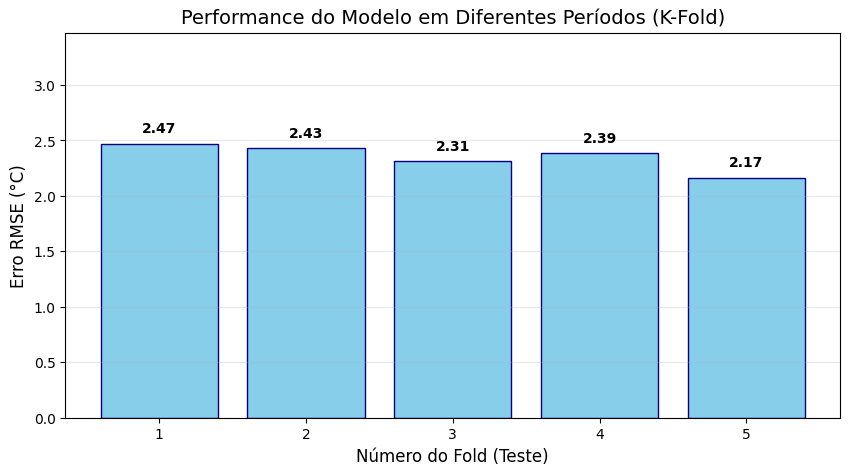

In [ ]:

plt.figure(figsize=(10, 5))
folds = range(1, len(rmse_scores) + 1)
plt.bar(folds, rmse_scores, color='skyblue', edgecolor='navy')

plt.title('Performance do Modelo em Diferentes Períodos (K-Fold)', fontsize=14)
plt.xlabel('Número do Fold (Teste)', fontsize=12)
plt.ylabel('Erro RMSE (°C)', fontsize=12)
plt.xticks(folds)
plt.ylim(0, max(rmse_scores) + 1)

for i, v in enumerate(rmse_scores):
    plt.text(i + 1, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

### MÓDULO 4: VISUALIZAÇÃO E ANÁLISE DOS RESULTADOS

Este bloco de código é responsável por:

1.  **Visualização Gráfica:**
    *   Gera um gráfico de linha que compara as **'Temperaturas Reais'** (`y_test_inv`) com as **'Previsões da IA (LSTM)'** (`predictions_inv`) para a amostra de teste do último *fold* da validação cruzada.
    *   O gráfico permite uma inspeção visual direta do quão bem o modelo LSTM está se ajustando aos dados de temperatura reais.
    *   Inclui título, rótulos para os eixos X e Y, uma legenda e uma grade para melhor clareza e leitura.

2.  **Cálculo do Erro Médio Absoluto (MAE):**
    *   Calcula os erros absolutos entre cada valor real e seu respectivo valor previsto: `np.abs(y_test_inv - predictions_inv)`.
    *   Em seguida, calcula a média desses erros absolutos para obter o **Erro Médio Absoluto (MAE)**: `np.mean(erros_absolutos)`.
    *   O MAE é uma métrica que indica, em média, por quantos graus Celsius a previsão da inteligência artificial difere da temperatura real.

3.  **Relatório Detalhado dos Últimos 5 Dias:**
    *   Exibe um pequeno relatório em formato de tabela.
    *   Mostra as temperaturas reais, as temperaturas previstas e a diferença absoluta entre elas para os **últimos 5 dias** da amostra de teste.
    *   Este relatório fornece uma visão detalhada da precisão do modelo para os dados mais recentes, o que é útil para entender seu desempenho no curto prazo.

Em resumo, este módulo oferece tanto uma representação visual quanto métricas quantitativas e um detalhamento específico para analisar a performance preditiva do modelo LSTM.

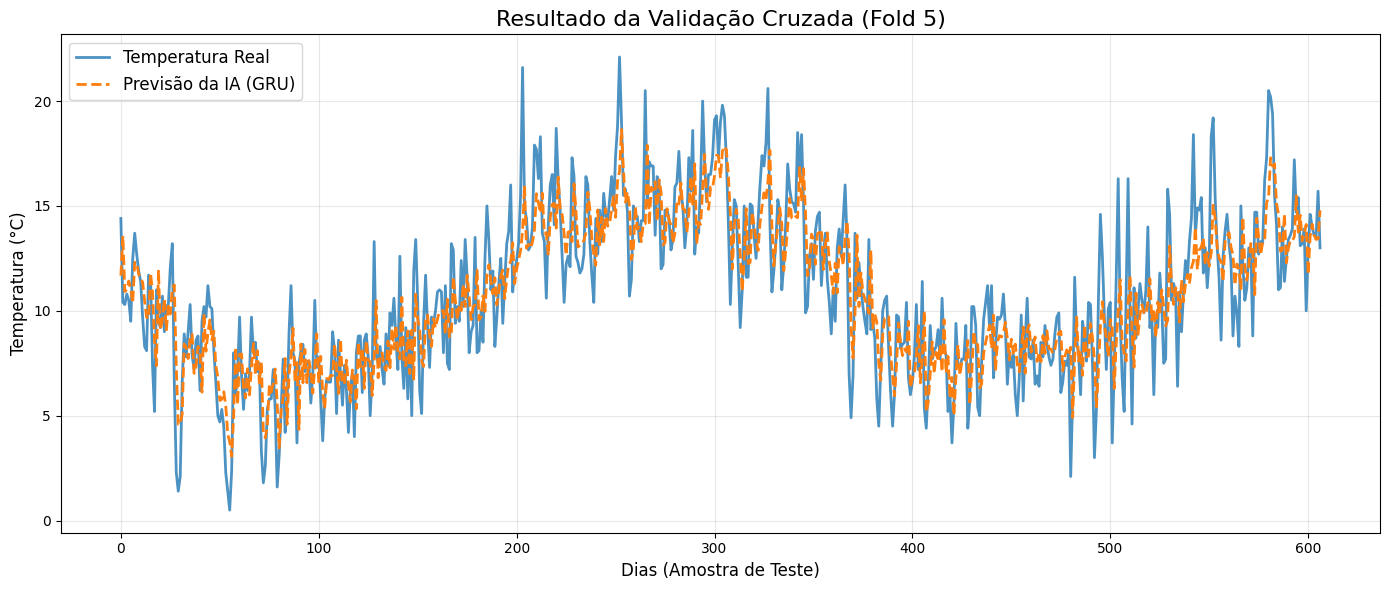


--- RELATÓRIO DE PRECISÃO ---
Erro Médio Absoluto (MAE): 1.70 °C
Isso significa que, em média, a IA erra a temperatura por 1.70 graus.

--- AMOSTRA DOS ÚLTIMOS 5 DIAS ---
DIA        | REAL       | PREVISTO   | DIFERENÇA 
--------------------------------------------------
Dia -5     | 14.00      | 14.12      | 0.12      
Dia -4     | 13.60      | 13.60      | 0.00      
Dia -3     | 13.50      | 13.40      | 0.10      
Dia -2     | 15.70      | 13.43      | 2.27      
Dia -1     | 13.00      | 14.79      | 1.79      


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

plt.plot(y_test_inv, label='Temperatura Real', color='#1f77b4', linewidth=2, alpha=0.8)

plt.plot(predictions_inv, label='Previsão da IA (GRU)', color='#ff7f0e', linestyle='--', linewidth=2)

plt.title(f'Resultado da Validação Cruzada (Fold {fold_no-1})', fontsize=16)
plt.xlabel('Dias (Amostra de Teste)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

erros_absolutos = np.abs(y_test_inv - predictions_inv)
erro_medio = np.mean(erros_absolutos)

print(f"\n--- RELATÓRIO DE PRECISÃO ---")
print(f"Erro Médio Absoluto (MAE): {erro_medio:.2f} °C")
print(f"Isso significa que, em média, a IA erra a temperatura por {erro_medio:.2f} graus.")

print("\n--- AMOSTRA DOS ÚLTIMOS 5 DIAS ---")
print(f"{'DIA':<10} | {'REAL':<10} | {'PREVISTO':<10} | {'DIFERENÇA':<10}")
print("-" * 50)
for i in range(5, 0, -1):
    real = y_test_inv[-i][0]
    prev = predictions_inv[-i][0]
    diff = abs(real - prev)
    print(f"Dia -{i:<5} | {real:<10.2f} | {prev:<10.2f} | {diff:<10.2f}")

MÓDULO EXTRA: Acurácia em Porcentagem

In [ ]:
epsilon = 1e-10
erro_percentual = np.mean(np.abs((y_test_inv - predictions_inv) / (y_test_inv + epsilon))) * 100
acuracia_percentual = 100 - erro_percentual

print(f"Erro percentual médio (MAPE): {erro_percentual:.2f}%")
print(f"Acurácia aproximada do modelo: {acuracia_percentual:.2f}%")

Erro percentual médio (MAPE): 21.19%
Acurácia aproximada do modelo: 78.81%


### MÓDULO 5: TREINO FINAL, GRÁFICOS E PREVISÃO

Este bloco de código é crucial para consolidar o modelo LSTM e gerar a previsão final. Ele executa as seguintes etapas:

1.  **Treinamento do Modelo Final**: Primeiramente, ele prepara os dados brutos de temperatura (`data_raw`) escalando-os novamente. Em seguida, usa a função `criar_janelas` para formatar todo o conjunto de dados para o treinamento. Um novo modelo LSTM (`model_final`) é construído com a mesma arquitetura dos modelos treinados nos *folds* anteriores (camada LSTM, Dropout e Dense). Este modelo é compilado e treinado usando *100% dos dados históricos* para garantir que ele aprenda a partir de toda a informação disponível.

2.  **Visualização da Curva de Aprendizado**: Após o treinamento, o código gera um gráfico mostrando a 'Curva de Aprendizado (Loss)'. Este gráfico exibe o erro (MSE) do modelo ao longo das 'Épocas' de treinamento, permitindo avaliar se o modelo aprendeu de forma consistente.

3.  **Visualização do Ajuste aos Dados Históricos**: Um segundo gráfico é criado para comparar as 'Temperaturas Reais' com as 'Previsões da IA (LSTM)' para os `dias_zoom` (últimos 365) dias. Isso mostra visualmente o quão bem o modelo final se ajusta aos dados históricos, indicando sua capacidade de capturar os padrões da série temporal.

4.  **Previsão para o Próximo Dia**: Para a previsão, o código extrai a 'última janela' de dados escalados (equivalente ao `TAMANHO_JANELA` definido anteriormente). Usando essa sequência, o `model_final` faz uma previsão para o próximo ponto no tempo. Essa previsão é então 'desnormalizada' de volta para a escala original de temperatura e exibida como a 'PREVISÃO PARA AMANHÃ'.

Iniciando treinamento final (LSTM) com 100% dos dados...
Modelo Final LSTM Treinado!


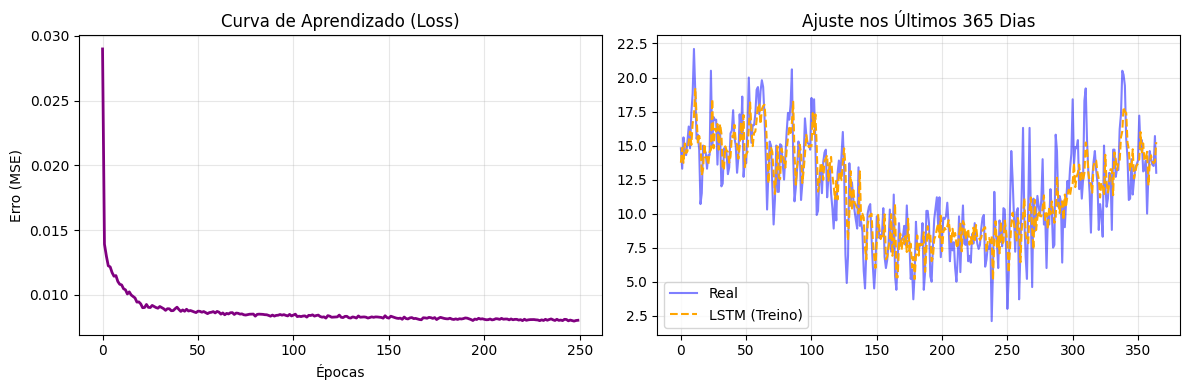


PREVISÃO PARA AMANHÃ (LSTM): 13.73 °C


In [ ]:
import matplotlib.pyplot as plt

print("Iniciando treinamento final (LSTM) com 100% dos dados...")

scaler_final = MinMaxScaler(feature_range=(0, 1))
dados_totais_scaled = scaler_final.fit_transform(data_raw)

X_total, y_total = criar_janelas(dados_totais_scaled, TAMANHO_JANELA)
X_total = np.reshape(X_total, (X_total.shape[0], X_total.shape[1], 1))

model_final = Sequential()
model_final.add(Input(shape=(X_total.shape[1], 1)))
model_final.add(LSTM(units=CELULAS, return_sequences=False))
model_final.add(Dropout(0.2))
model_final.add(Dense(1))

model_final.compile(optimizer='adam', loss='mean_squared_error')

history = model_final.fit(X_total, y_total, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print("Modelo Final LSTM Treinado!")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='purple', linewidth=2)
plt.title('Curva de Aprendizado (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Erro (MSE)')
plt.grid(True, alpha=0.3)

previsao_total_scaled = model_final.predict(X_total, verbose=0)
previsao_total = scaler_final.inverse_transform(previsao_total_scaled)
y_total_real = scaler_final.inverse_transform(y_total.reshape(-1, 1))

plt.subplot(1, 2, 2)
dias_zoom = 365
plt.plot(y_total_real[-dias_zoom:], label='Real', color='blue', alpha=0.5)
plt.plot(previsao_total[-dias_zoom:], label='LSTM (Treino)', color='orange', linestyle='--')
plt.title(f'Ajuste nos Últimos {dias_zoom} Dias')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ultima_janela = dados_totais_scaled[-TAMANHO_JANELA:]
ultima_janela = np.reshape(ultima_janela, (1, TAMANHO_JANELA, 1))
previsao_scaled = model_final.predict(ultima_janela, verbose=0)
previsao_final = scaler_final.inverse_transform(previsao_scaled)

print("\n" + "="*40)
print(f"PREVISÃO PARA AMANHÃ (LSTM): {previsao_final[0][0]:.2f} °C")
print("="*40)

DISCUSSÃO DOS RESULTADOS

Os resultados foram parcialmente satisfatorios com os resultados dos treinos com margem aceitaveis,
porem alguns pontos foram levantados como a necessidade de adaptação por precisar de metodologias para tratar do dataset que possuia uma quantidade de dados insatisfatoria
durante o processo varios pontos de melhoria foram levantados pelos participantes do grupo como a alteração da quantidade de celulas, epocas e mais futuramente a utilização do K-FOLD Temporal que auxiliou em uma grande aproximação entre as taxas de erro do treinamento e do teste mostrando a falta de dados para um treinamento mais preciso da inteligencia artificial.
Porem assim com citado acima os resultados parcialmente satisfatorios com uma acuracia aceitavel de 78.81% tendo um erro medio Erro Médio: 1.70 °C e com uma curva de aprendizagem aceitavel.

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
#import tensorflow as tf
#tf.config.list_physical_devices('GPU')